In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/인공지능/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data.isnull().sum()# 결측치 제거

YearsExperience    0
Salary             0
dtype: int64

In [6]:
X=data.drop('YearsExperience',axis=1)
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
y = data['YearsExperience']
y.value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape

(24, 1)

In [12]:
y_train.shape

(24, 28)

In [13]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (1,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [16]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/100
1/1 [==============================] - 0s 435ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0345 - mse: 0.0

1/1 [==============================] - 0s 31ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 64/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 65/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 66/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 67/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 68/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 69/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 70/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0345 - mse: 0.0345 - 

In [17]:
test_mse_score

0.03484369441866875

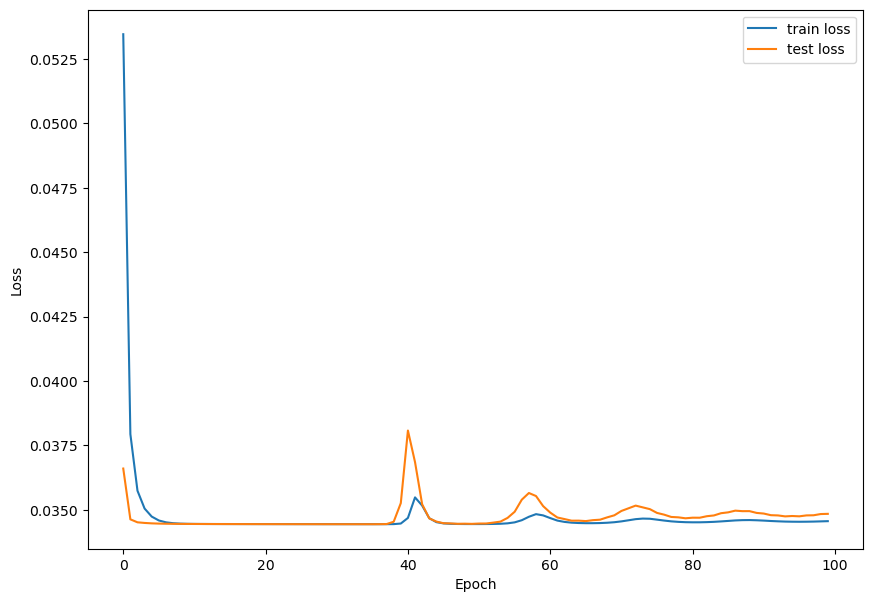

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

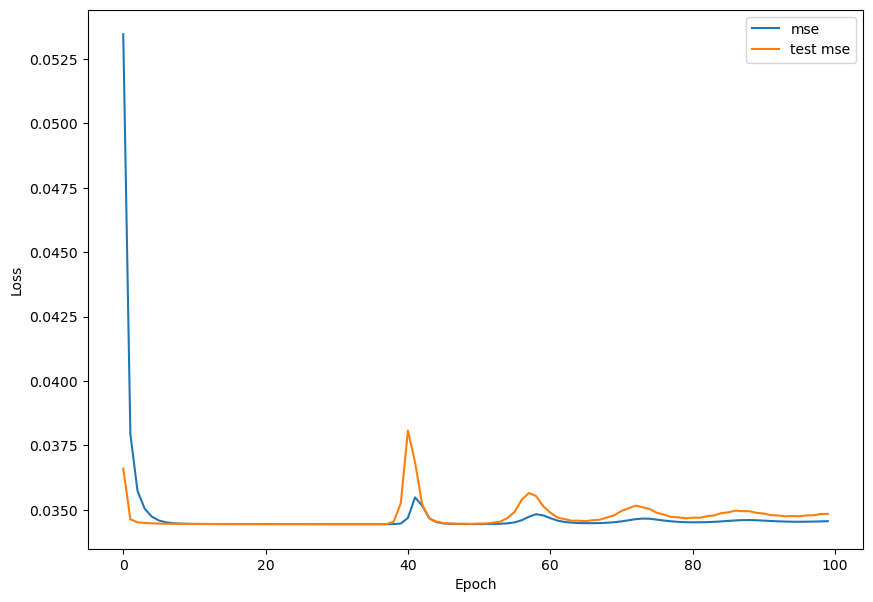

In [19]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()